In [30]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('pokemon.csv', sep=',', encoding='utf-8')

In [31]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [32]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [34]:
ProfileReport(df)

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
avg_hp_by_type = df[['Type 1', 'HP']].groupby(['Type 1']).mean().sort_values('HP', ascending=False)


In [ ]:
val = []
for ele in avg_hp_by_type.values.tolist():
    val.append(ele[0])
    

In [ ]:
from matplotlib import pyplot as plt

<Axes: xlabel='Type 1'>

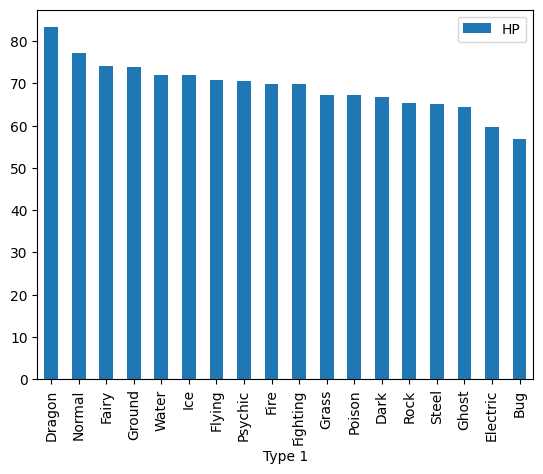

In [ ]:
avg_hp_by_type.plot.bar()

C:\Users\artur\AppData\Local\Temp\ipykernel_2672\2771736717.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


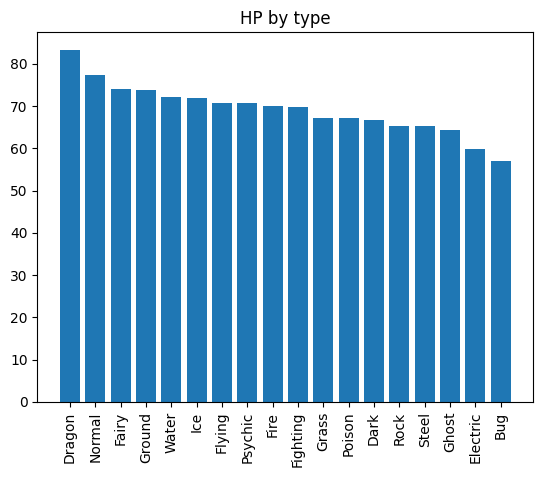

In [ ]:
fig, ax = plt.subplots()
bar = avg_hp_by_type.index
ax.bar(bar, val)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('HP by type')
plt.show()

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
n_of_pokemons_by_type = df[['#', 'Type 1']].groupby('Type 1').count()

In [ ]:
n_pokemons = n_of_pokemons_by_type['#'].sum()

In [ ]:
percentage_type = n_of_pokemons_by_type['#'].apply(lambda x: x/n_pokemons)

In [ ]:
cat = percentage_type.index.tolist()
percentage = percentage_type.values.tolist()

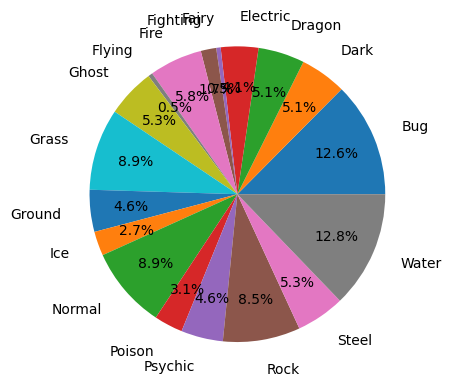

In [ ]:
fig, ax = plt.subplots()
ax.pie(percentage, labels=cat,autopct='%1.1f%%', pctdistance=0.725, labeldistance=1.2)
plt.show()

In [ ]:
is_legendary = df[['#', 'Legendary']].groupby('Legendary').count()

In [ ]:
is_legendary

,#
Legendary,
False,374
True,40


In [ ]:
percentage_leg = is_legendary['#'].apply(lambda x: x/n_pokemons)

In [ ]:
percentage_leg

Legendary
False    0.903382
True     0.096618
Name: #, dtype: float64

In [ ]:
cat = percentage_leg.index.tolist()
percentage = percentage_leg.values.tolist()

# pie chart

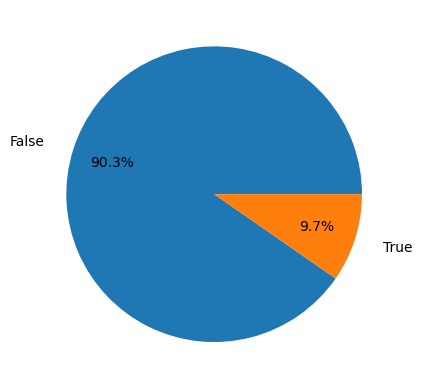

In [ ]:
fig, ax = plt.subplots()
ax.pie(percentage, labels=cat,autopct='%1.1f%%', pctdistance=0.725, labeldistance=1.2)
plt.show()


In [ ]:
df[['Legendary']]

,Legendary
0,False
1,False
2,False
3,False
6,False
...,...
795,True
796,True
797,True
798,True


In [ ]:
legendary = df[df['Legendary']==True]
non_legendary = df[df['Legendary']==False]

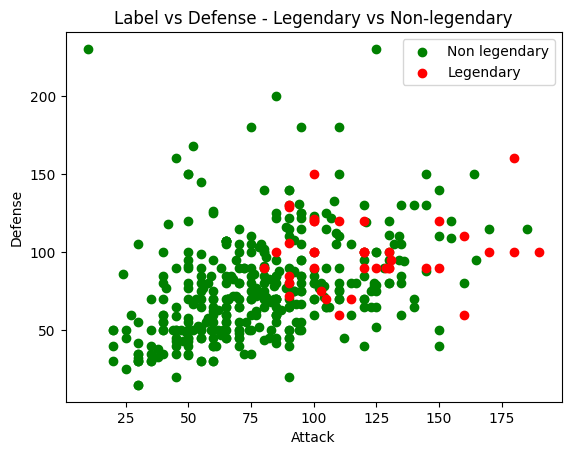

In [ ]:
x_l = legendary['Attack']
y_l = legendary['Defense']

x_n = non_legendary['Attack']
y_n = non_legendary['Defense']

plt.scatter(x_n, y_n, color = 'green', label='Non legendary')
plt.scatter(x_l, y_l, color = 'red', label = 'Legendary')
plt.legend()
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Label vs Defense - Legendary vs Non-legendary')

plt.show()

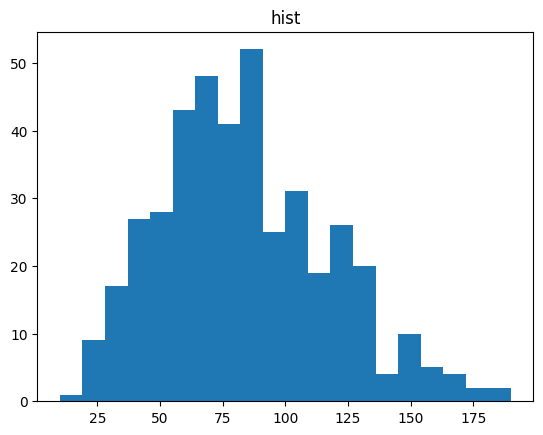

In [ ]:
plt.hist(df['Attack'], bins = 20)
plt.title('hist')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21c160b35d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c162cddd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c12db8210>],
 'medians': [<matplotlib.lines.Line2D at 0x21c162cf290>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c16297d10>],
 'means': []}

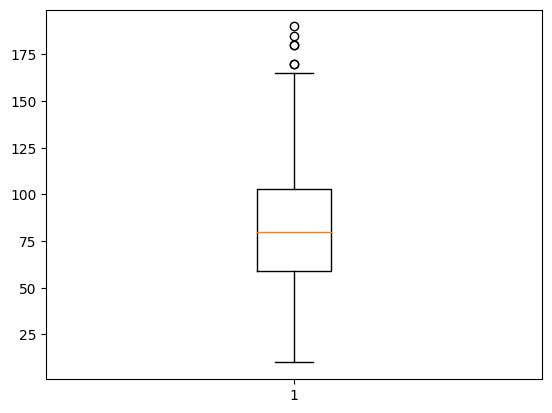

In [ ]:
plt.boxplot(df['Attack'])

# pomysl
1. pobranie danych (scraper lub api, csv)
2. ogarniecie danych, zapis do pandas df
3. kilka prostych wykresow
4. 